
# <center><font style="color:rgb(100,109,254)">Image Addition, Resizing & Blending</font></center>


In [1]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt
img = cv2.imread('media/M2/avengers.jpg',1)

###  <font style="color:rgb(134,19,348)">Code Optimization Check</font>

Computer vision is just like maths , there are multiple approaches to solve a single problem so you must should evaluate how long your approach takes vs an alternative approach , the small program below can calculate the time it takes for a certain program to complete.

In [2]:
import time
t1 = time.time()  #unix timesteps for now  , its time in milliseconds from 1st january 1970
y = 0

for x in range(100000):
    y+=x   #we are simply adding a value 100000 times
    
print(y)    
t2 = time.time()
total_time = t2 - t1
print('Time taken to complete {}'.format(total_time))

4999950000
Time taken to complete 0.014009237289428711


###  <font style="color:rgb(134,19,348)">Image Addition</font>

Now we add images together with opencv and numpy and you can see that opencv implementaion is twice as fast, In one image we remove 2 channels and in another we will remove 1 channel and then add these two images to attain back the original image.

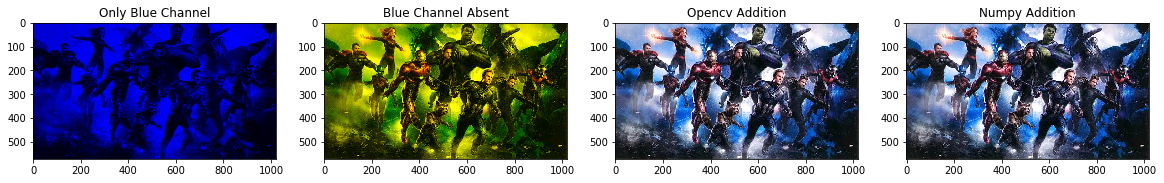

In [3]:
im1 =img.copy() 
im2 =img.copy()


im1[:,:,1:] = 0  # only blue channel present others are removed
im2[:,:,0] = 0   # only removing blue channel

opencv_add = cv2.add(im1,im2) # Opencv Addition, this is twice as fast

numpy_add = im1 + im2   # Numpy Addition


plt.figure(figsize=[20,20])
plt.subplot(141);plt.imshow(im1[:,:,::-1]);plt.title("Only Blue Channel");
plt.subplot(142);plt.imshow(im2[:,:,::-1]);plt.title("Blue Channel Absent");
plt.subplot(143);plt.imshow(opencv_add[:,:,::-1]);plt.title("Opencv Addition");
plt.subplot(144);plt.imshow(numpy_add[:,:,::-1]);plt.title("Numpy Addition");

###  <font style="color:rgb(134,19,348)">Image Resizing</font>
We have two ways of image resizing, either to pass in the desired values for height or width or resize by a percentage 

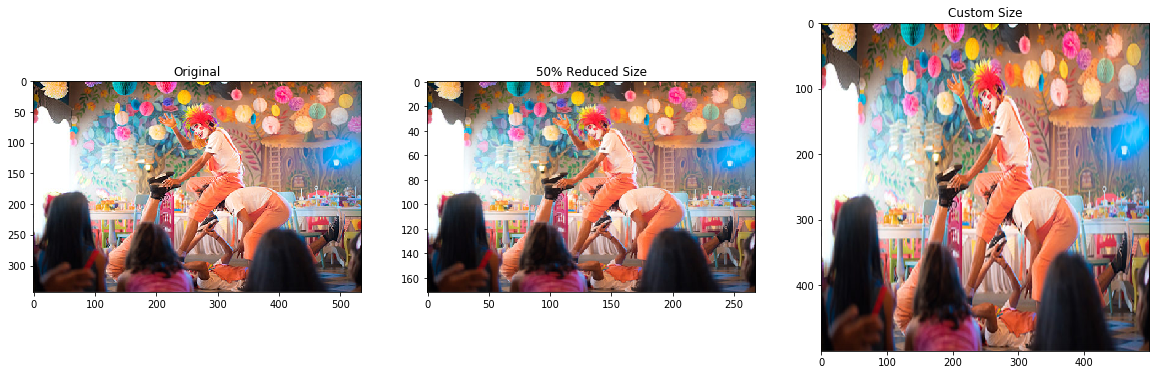

In [4]:
img = cv2.imread('media/M2/party.jpg',1)
#Method 1
halfimg = cv2.resize(img, (0,0), fx=0.5, fy=0.5) # make the image 50% of its orignal size
#Method 2
custom_size = cv2.resize(img, (500,500))   #Specify a custom size, width first than height

plt.figure(figsize=[20,20])
plt.subplot(131);plt.imshow(img[:,:,::-1]);plt.title("Original");
plt.subplot(132);plt.imshow(halfimg[:,:,::-1]);plt.title("50% Reduced Size");
plt.subplot(133);plt.imshow(custom_size[:,:,::-1]);plt.title("Custom Size");

#### <i>  </i>
####  <font style="color:rgb(184,69,94)"> Note: Always remember while Opencv deals with images as x,y or cols,rows, numpy treats them as y,x or rows,cols this is the reason when you run image.shape you will get rows, cols but when you specify a size to resize you will enter cols , rows.</font>


###  <font style="color:rgb(134,19,348)"> Resizing While keeping the Aspect Ratio Constant</font>

Did you noticed the problem with the custom size, the image look distorted, this happens if you try to specify both custom height and weight. So in order to prevent such distortions from happening you have to keep the Aspect Ratio (height/width ratio)
constant. You can do that by specifying a custom size for either height or width and rescale the other accordingly.

The new shape is: (432, 672, 3) 


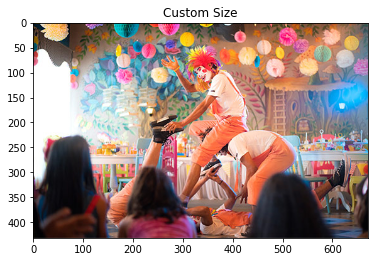

In [5]:
width = 672 # lets have width of 672
h,w = img.shape[:2]
width_ratio= width/w  # calculate the ratio of change in width
custom_size = cv2.resize(img, (width,int(width_ratio * h)))  # multiply that same change to height and convert to int

print('The new shape is: {} '.format(custom_size.shape))
plt.imshow(custom_size[:,:,::-1]);plt.title("Custom Size");

###  <font style="color:rgb(134,19,348)"> Image Blending</font>

We have seen we can add images together but if we want to blend two images toghther like for example show some 60% of one image and 40% of the other. We can do that in OpenCV by using the [```cv2.addWeighted()```](https://docs.opencv.org/4.2.0/d2/de8/group__core__array.html#gafafb2513349db3bcff51f54ee5592a19) function.

**Parameters For this function**

**Input:**:
- `src1` – first input array. (1st Image)
- `alpha` – weight of the first array elements.
- `src2` – second input array of the same size and channel number as src1. (2nd Image)
- `beta` – weight of the second array elements.
- `gamma` – scalar added to each sum. (we mostly leave this at 0)

**Output:**
 
 A weighted Average Array

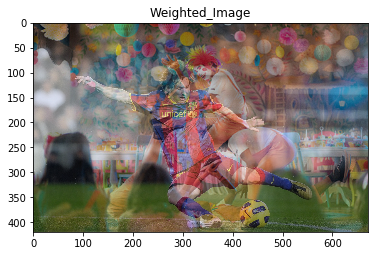

In [9]:
img1 = cv2.imread('media/M2/ballplay.jpeg',1)
img2= cv2.imread('media/M2/party.jpg',1)

first_image = cv2.resize(img1, (0,0), fx=0.4, fy=0.4) 
second_image = cv2.resize(img2, (672, 420))   

# We have made sure both images shapes matches for which is a requirement for blending

weighted_image = cv2.addWeighted(first_image,0.5,second_image,0.5,0) # We are adding 50 % of weight to each Image
plt.imshow(weighted_image[:,:,::-1]);plt.title("Weighted_Image");   

###  <font style="color:rgb(134,19,348)"> We can Also add weighted average manually</font>

Note: By multiplying the image by a float value i.e. 0.5 we convert the image to float so now to display the image we must either convert back to int or divide by 255 to get the range to be in float

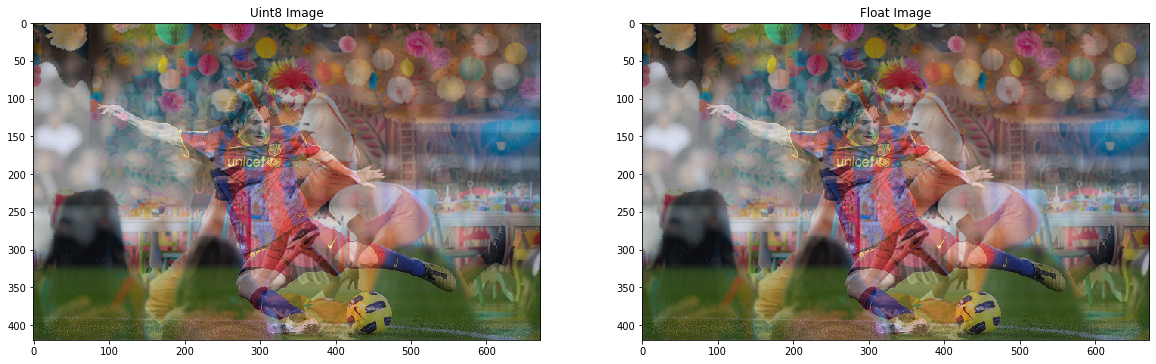

In [8]:
custom_add_float= (first_image * 0.5 + second_image * 0.5) / 255
custom_add_int = (first_image * 0.5 + second_image * 0.5).astype('uint8')

plt.figure(figsize=[20,20])
plt.subplot(121);plt.imshow(custom_add_float[:,:,::-1]);plt.title("Uint8 Image");
plt.subplot(122);plt.imshow(custom_add_int[:,:,::-1]);plt.title("Float Image");     